Supervised Learning Capstone
Data: Airline passenger satisfaction survey

EDA notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ihbthink/ds_class/master/train.csv')

print(df.shape)
print(df.info())
print(df.head())

(103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location             

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
# verify that none of the id's are duplicated

df['id'].nunique()

103904

In [5]:
# replace NaN values in arrival delays with values in departure delays

df['Arrival Delay in Minutes'].isna().sum()

df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

df['Arrival Delay in Minutes'].isna().sum()

0

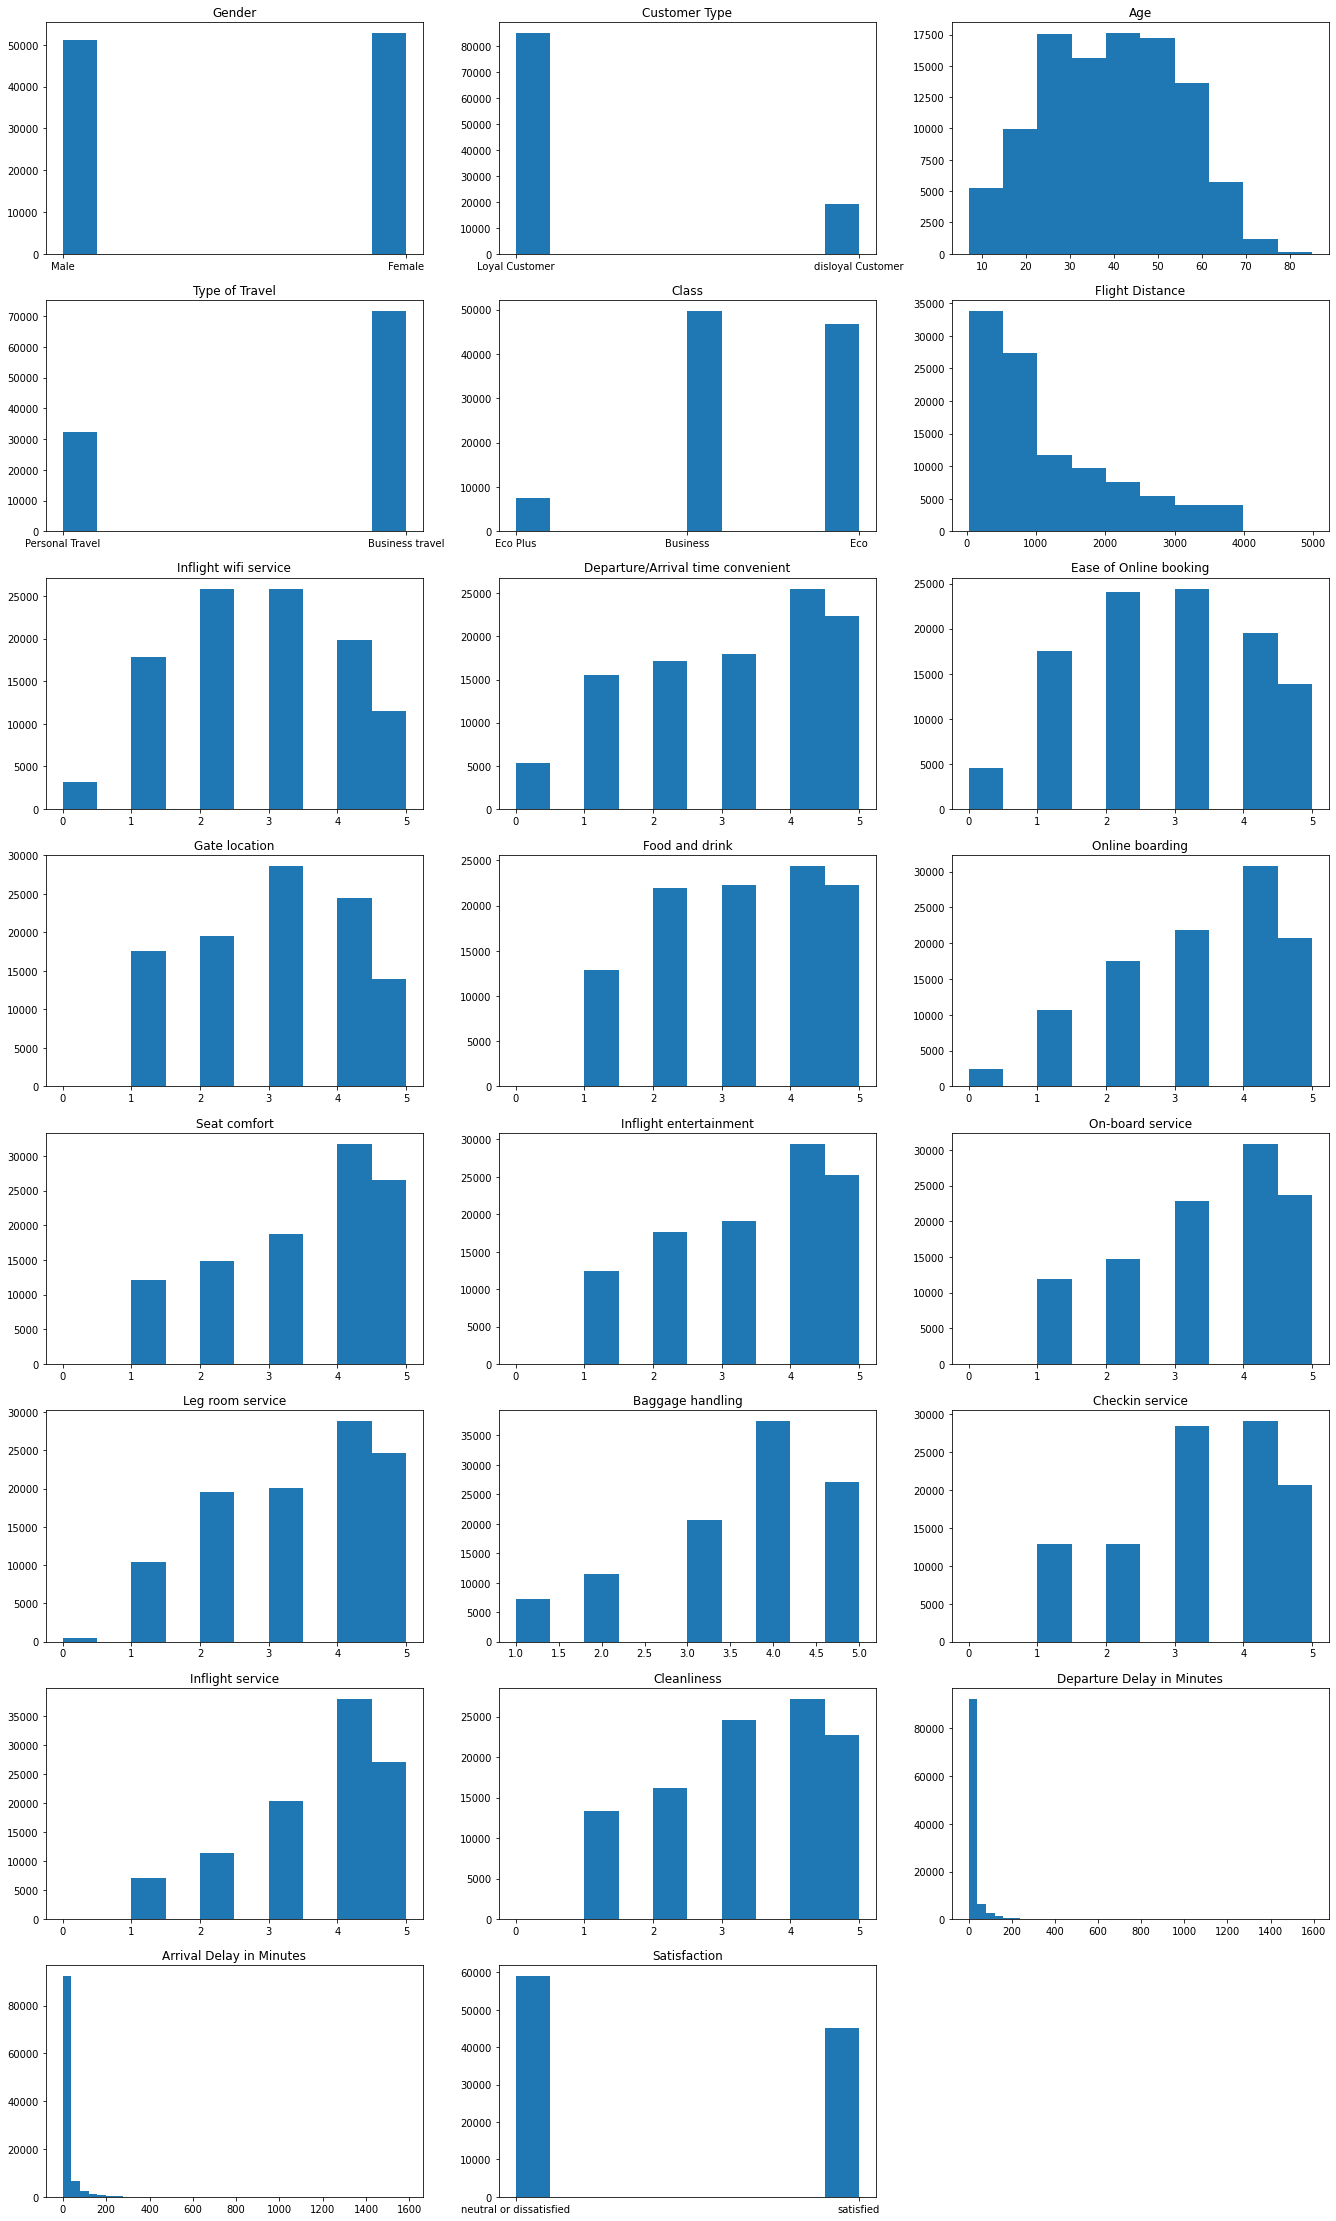

In [ ]:
# histograms

plt.figure(figsize=(23,40))

plt.subplot(8,3,1)
plt.hist(df['Gender'])
plt.title('Gender')
plt.subplot(8,3,2)
plt.hist(df['Customer Type'])
plt.title('Customer Type')
plt.subplot(8,3,3)
plt.hist(df['Age'])
plt.title('Age')
plt.subplot(8,3,4)
plt.hist(df['Type of Travel'])
plt.title('Type of Travel')
plt.subplot(8,3,5)
plt.hist(df['Class'])
plt.title('Class')
plt.subplot(8,3,6)
plt.hist(df['Flight Distance'])
plt.title('Flight Distance')
plt.subplot(8,3,7)
plt.hist(df['Inflight wifi service'])
plt.title('Inflight wifi service')
plt.subplot(8,3,8)
plt.hist(df['Departure/Arrival time convenient'])
plt.title('Departure/Arrival time convenient')
plt.subplot(8,3,9)
plt.hist(df['Ease of Online booking'])
plt.title('Ease of Online booking')
plt.subplot(8,3,10)
plt.hist(df['Gate location'])
plt.title('Gate location')
plt.subplot(8,3,11)
plt.hist(df['Food and drink'])
plt.title('Food and drink')
plt.subplot(8,3,12)
plt.hist(df['Online boarding'])
plt.title('Online boarding')
plt.subplot(8,3,13)
plt.hist(df['Seat comfort'])
plt.title('Seat comfort')
plt.subplot(8,3,14)
plt.hist(df['Inflight entertainment'])
plt.title('Inflight entertainment')
plt.subplot(8,3,15)
plt.hist(df['On-board service'])
plt.title('On-board service')
plt.subplot(8,3,16)
plt.hist(df['Leg room service'])
plt.title('Leg room service')
plt.subplot(8,3,17)
plt.hist(df['Baggage handling'])
plt.title('Baggage handling')
plt.subplot(8,3,18)
plt.hist(df['Checkin service'])
plt.title('Checkin service')
plt.subplot(8,3,19)
plt.hist(df['Inflight service'])
plt.title('Inflight service')
plt.subplot(8,3,20)
plt.hist(df['Cleanliness'])
plt.title('Cleanliness')
plt.subplot(8,3,21)
plt.hist(df['Departure Delay in Minutes'], bins=40)
plt.title('Departure Delay in Minutes')
plt.subplot(8,3,22)
plt.hist(df['Arrival Delay in Minutes'], bins=40)
plt.title('Arrival Delay in Minutes')
plt.subplot(8,3,23)
plt.hist(df['satisfaction'])
plt.title('Satisfaction')

plt.show()

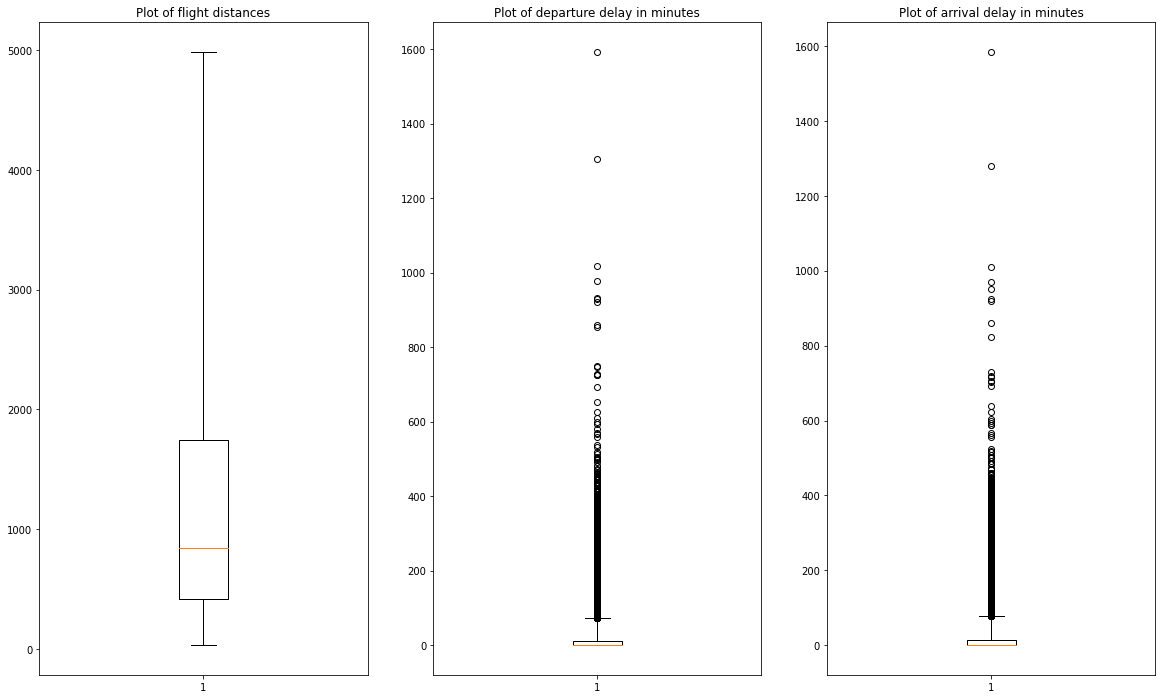

In [ ]:
# look for outliers in delay times and flight distance

plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
plt.boxplot(df['Flight Distance'], whis = 5)
plt.title('Plot of flight distances')

plt.subplot(1,3,2)
plt.boxplot(df['Departure Delay in Minutes'], whis = 5)
plt.title('Plot of departure delay in minutes')

plt.subplot(1,3,3)
plt.boxplot(df['Arrival Delay in Minutes'], whis = 5)
plt.title('Plot of arrival delay in minutes')

plt.show()

Study relationships between features and target with correlation heatmaps.

Text(0.5, 1.0, 'Numeric Feature Correlation Heatmap')

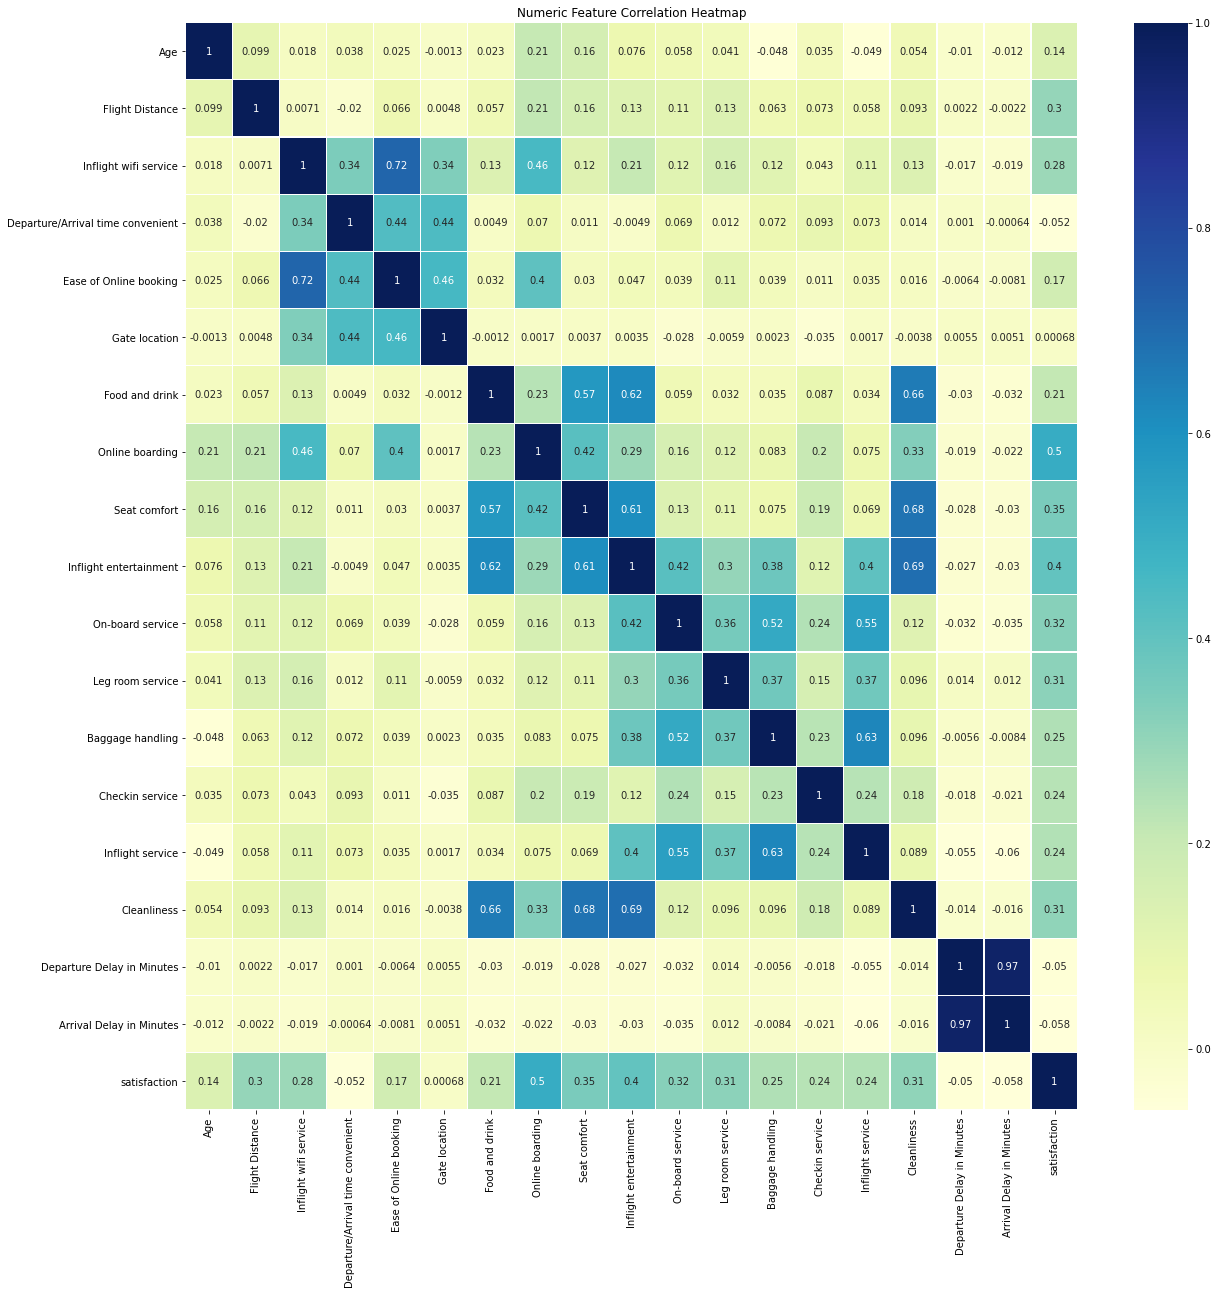

In [6]:

# convert target (satisfaction) to numeric value so it will be included

df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)

corr_df = df.drop(['Gender','Customer Type','Type of Travel','Class','id'], axis=1)

corr_index = corr_df.corr()

fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(corr_index, annot=True, linewidth=0.1, cmap='YlGnBu')
plt.title('Numeric Feature Correlation Heatmap')

Text(0.5, 1.0, 'Onboard Experience Correlation Heatmap')

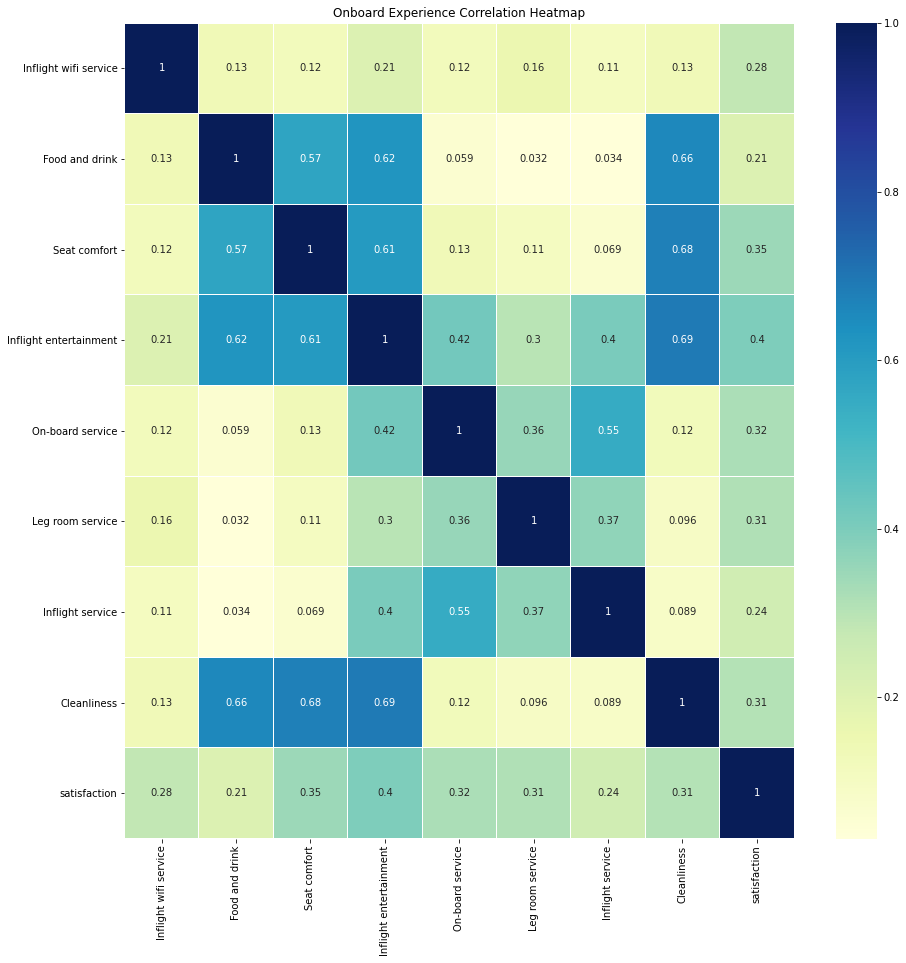

In [ ]:
# create correlation heat map for onboard experience

onboard_df = df.drop(['Gender','Customer Type','Type of Travel','Class','id','Age','Flight Distance','Departure/Arrival time convenient','Ease of Online booking','Gate location','Online boarding','Baggage handling',
                      'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

onboard_corr = onboard_df.corr()

fig, ax = plt.subplots(figsize=(15,15))    
sns.heatmap(onboard_corr, annot=True, linewidth=0.1, cmap='YlGnBu')
plt.title('Onboard Experience Correlation Heatmap')

Text(0.5, 1.0, 'Preflight Experience Correlation Heatmap')

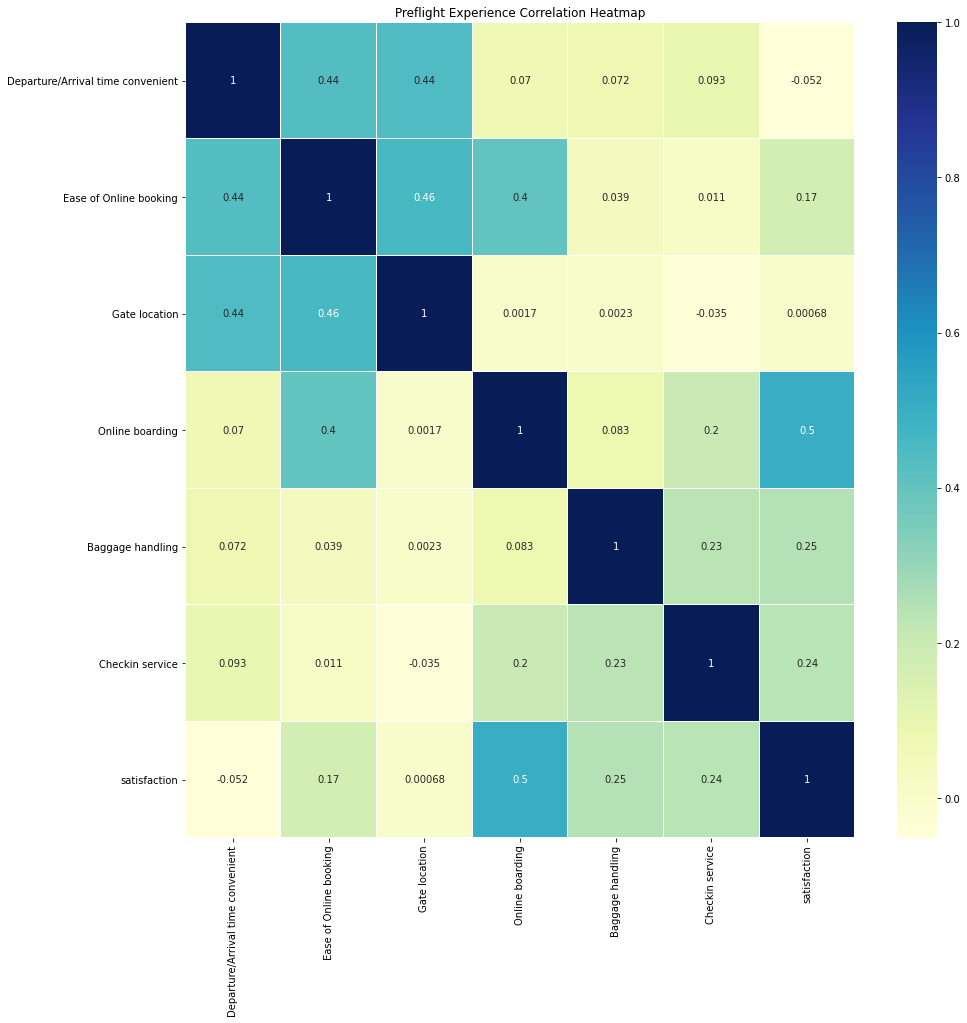

In [ ]:
# create correlation heat map for preflight experience

preflight_df = df.drop(['Gender','Customer Type','Type of Travel','Class','id','Age','Flight Distance','Inflight wifi service','Food and drink','Seat comfort','Inflight entertainment','On-board service',
                      'Leg room service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight service', 'Cleanliness'], axis=1)

preflight_corr = preflight_df.corr()

fig, ax = plt.subplots(figsize=(15,15))    
sns.heatmap(preflight_corr, annot=True, linewidth=0.1, cmap='YlGnBu')
plt.title('Preflight Experience Correlation Heatmap')

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.245072
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.808674
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Airlines spend a lot of time and attention on loyalty programs and business travelers.  Do those investments pay off in higher satisfaction levels?

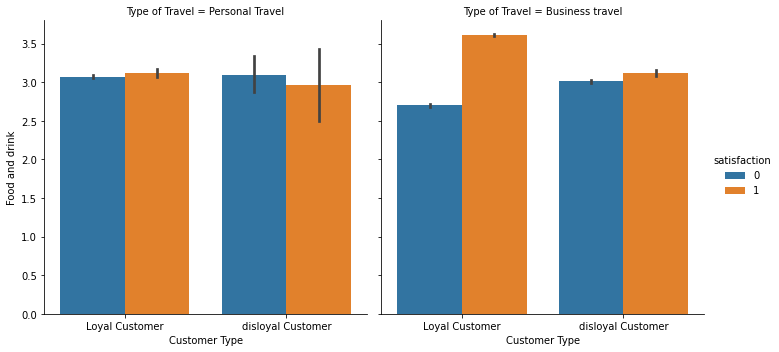

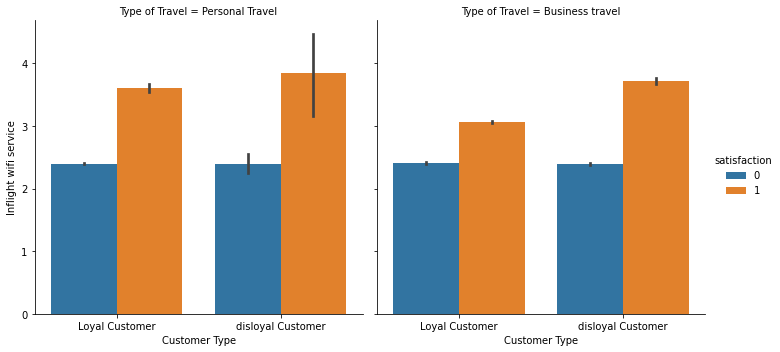

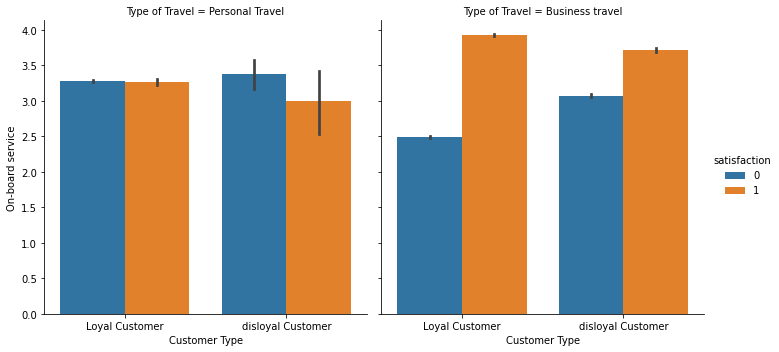

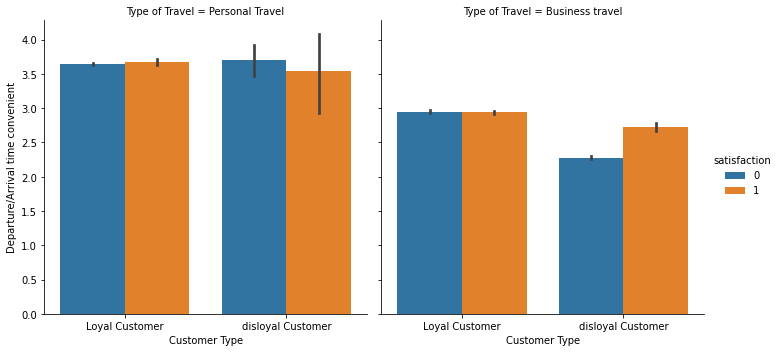

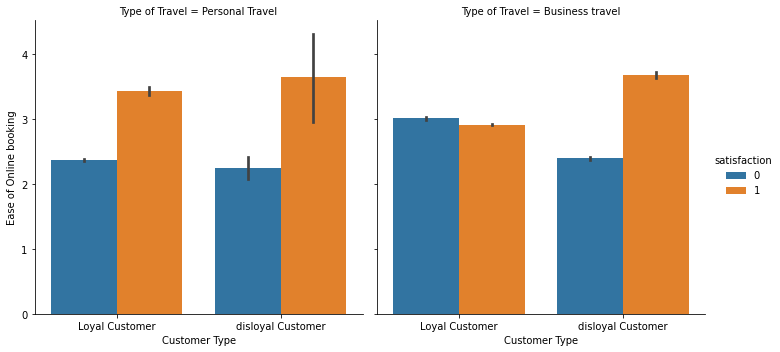

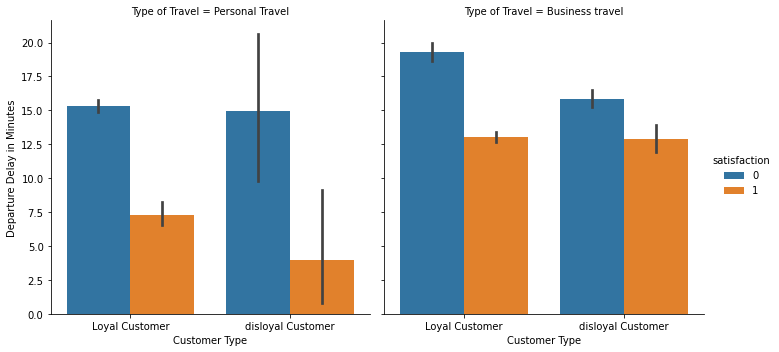

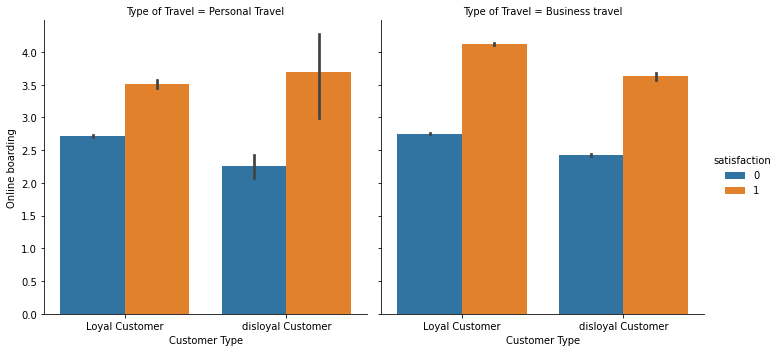

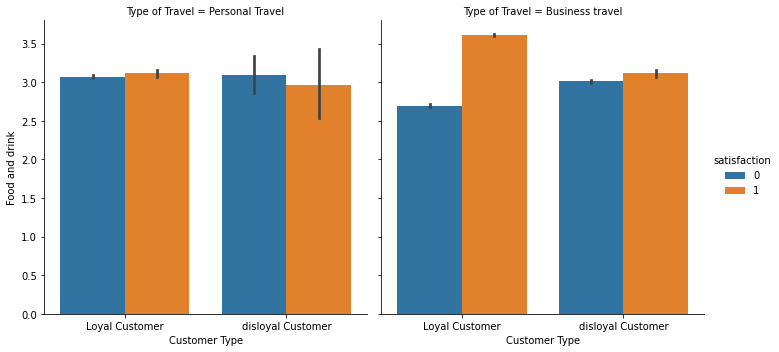

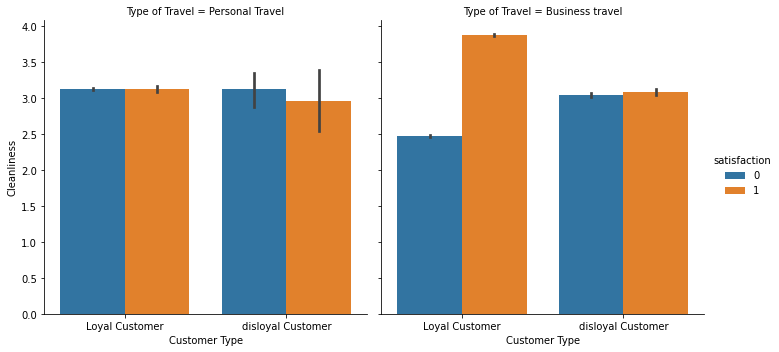

In [20]:

sns.catplot(x='Customer Type',y='Food and drink', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Inflight wifi service', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='On-board service', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Departure/Arrival time convenient', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Ease of Online booking', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Departure Delay in Minutes', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Online boarding', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Food and drink', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)
sns.catplot(x='Customer Type',y='Cleanliness', col= 'Type of Travel', kind='bar',hue='satisfaction',data=df)


Loyalty program participation appears to have some influence on satisfaction scores, particularly among business travelers.  Food and drink and onboard service ratings appear to be affected the most, with business travelers rating higher satisfaction levels than personal travelers.  

Hypothesis testing

Do customers in loyalty programs experience different satisfaction rates than non-participants?

H0: Loyalty program participation and satisfaction are independent.

H1: Loyalty program participation and satisfaction are not independent; there is an association.

Both variables (Customer Type and satisfaction) are categorical, so use chi-squared test to determine if they are independent of each other.

In [ ]:
from scipy.stats import chi2_contingency

# create contingency table
print(df.groupby('Customer Type')['satisfaction'].value_counts())

table = [[44390, 40533], [14489, 4492]]

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    44390
                   satisfied                  40533
disloyal Customer  neutral or dissatisfied    14489
                   satisfied                   4492
Name: satisfaction, dtype: int64


In [ ]:
# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)

# select significance value
alpha = 0.05

print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.000
Variables are associated (reject H0)


The null is rejected; the features are associated.  Customers in loyalty programs appear to rate their experience as satisfactory at a higher rate than customers who do not participate in the programs.

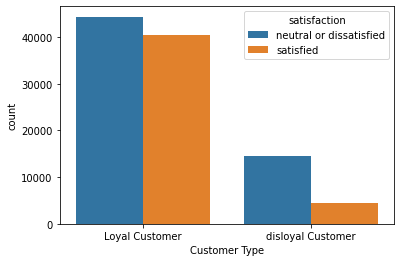

In [ ]:
ax = sns.countplot(x='Customer Type', hue='satisfaction', data=df)